Код по мотивам модели клубов конвергенции из курса макроэкономики:

$a_t$ - это относительное расстояние страны до технологической границы. 

В каждом периоде страна догоняет технологическую границу либо с постоянной скоростью, либо с некоторой вероятностью.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Простое (детерминированное) разностное уравнение:

$a_{t+1}=\frac{a_t}{1+g}(1 + \xi - \frac{\xi}{1+g}a_t)$

Стационарное состояние: $a_t=\frac{(\xi-g)(1+g)}{\xi}$ при $\xi > g$ и $a_t=0$ при $0\leq \xi \leq g$. При $\xi < 0 $ улетит на бесконечность.

In [3]:
g = 0.02  # два параметра для всего ноутбука вперед!
ksi = 0.5


# считаем следующий шаг
def a_t_1(g, ksi, at):
    return at * (1 + ksi - ksi * at / (1 + g)) / (1 + g)


# считаем несколько шагов
def go(g, ksi, a_0, n_steps):
    steps = [a_0]
    for i in range(n_steps):
        a_0 = a_t_1(g, ksi, a_0)
        steps.append(a_0)
    return steps


# равновесие
def eqm(ksi, g):
    return (ksi - g) * (1 + g) / ksi

Семинар 8-10, задача 4, п. 2, буквы а), б) Ну еще, макра-1, 3 модуль, 2 курс, ВШЭ, Москва, Россия 😋

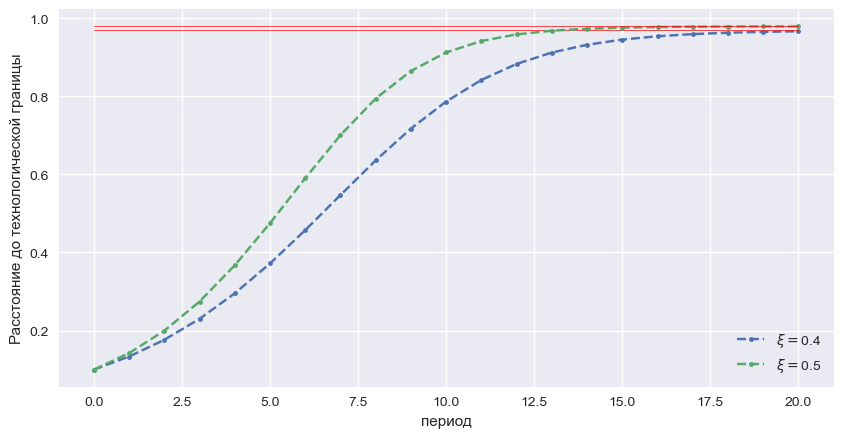

In [6]:
fig, ax = plt.subplots(figsize=[10, 5], dpi=100)
n = 20  # число шагов

for ksi in [0.4, 0.5]:
    ax.plot(np.arange(n + 1), go(g, ksi, 0.1, n), 
            '.--', label=r'$\xi=${}'.format(ksi))
    ax.plot(np.arange(n+1), 
            np.full(n+1, eqm(ksi, g)), 'r', lw=0.5)

ax.set(xlabel='период', 
       ylabel='Расстояние до технологической границы')
ax.legend();

Когда $0\leq \xi \leq g$:

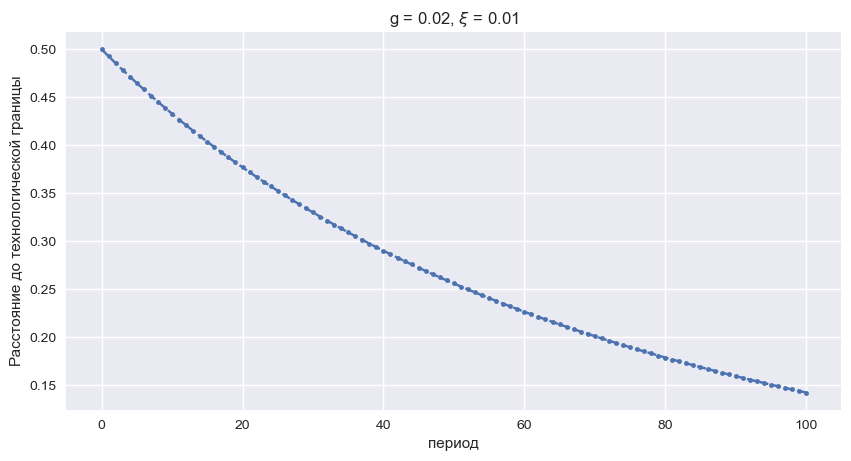

In [9]:
fig, ax = plt.subplots(figsize=[10, 5], dpi=100)
n = 100
ks = g - 0.01

ax.plot(np.arange(n + 1), go(g, ks, 0.5, n), '.--')
ax.set(xlabel='период', 
       ylabel='Расстояние до технологической границы',
       title=r'g = {}, $\xi$ = {}'.format(g, ks));

Основная диаграмма модели клубов конвергенции:

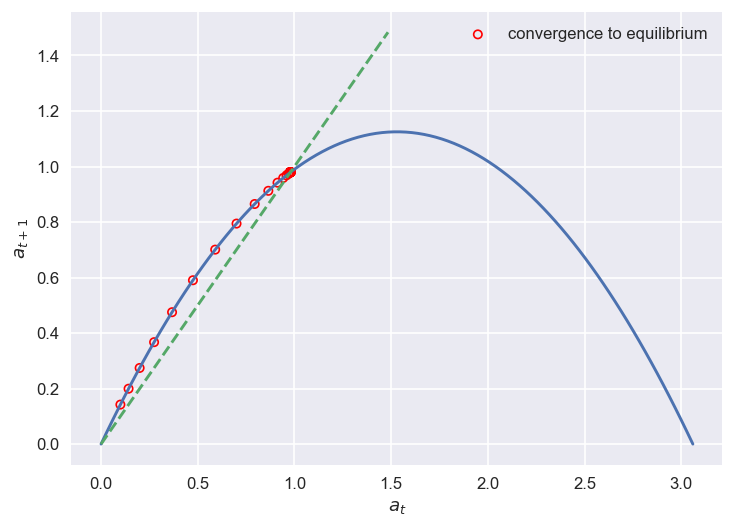

In [33]:
fig, ax = plt.subplots(figsize=[7, 5], dpi=120)

steps = go(g, ksi, 0.1, n)
t = np.linspace(0, (1 + ksi) * (1 + g) / ksi, 100)
a = a_t_1(g, ksi, t)

ax.plot(t, a)  # уравнение динамики
ax.plot(t[t < 1.5], t[t < 1.5], '--')
ax.scatter(steps[:-1], steps[1:], fc='None', ec='r', 
           lw=1, s=25, label='convergence to equilibrium')
ax.set(xlabel=r'$a_t$', ylabel=r'$a_{t+1}$')
ax.legend();

И картинка для задания с семинара:

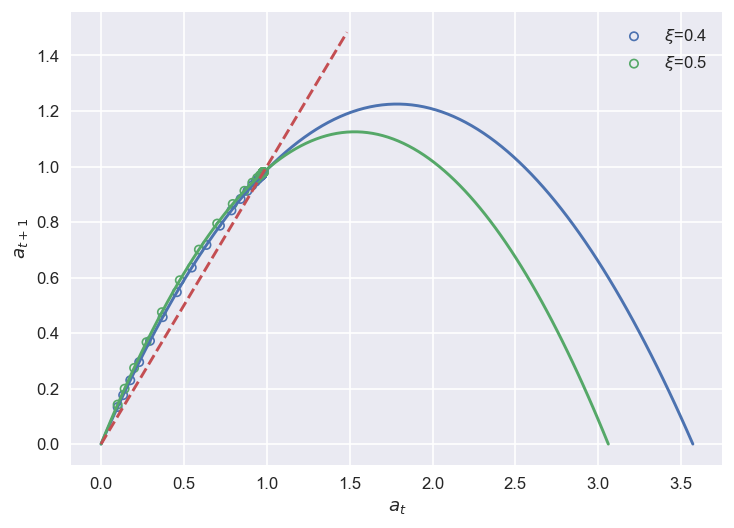

In [58]:
fig, ax = plt.subplots(figsize=[7, 5], dpi=120)

for j, ksi in enumerate([0.4, 0.5]):
    steps = go(g, ksi, 0.1, n)
    t = np.linspace(0, (1 + ksi) * (1 + g) / ksi, 100)
    a = a_t_1(g, ksi, t)

    ax.plot(t, a, 'C' + str(j))  # уравнение динамики
    ax.scatter(steps[:-1], steps[1:], 
               fc='None', ec='C' + str(j), 
               lw=1, s=25, label=r'$\xi$={}'.format(ksi))  # траектория

ax.plot(t[t < 1.5], t[t < 1.5], '--C2')
ax.set(xlabel=r'$a_t$', ylabel=r'$a_{t+1}$')
ax.legend();

In [36]:
print('xi=0.5 => стационарное состояние=', eqm(0.5, g))
print('xi=0.4 => стационарное состояние=', eqm(0.4, g))

xi=0.5 => стационарное состояние= 0.9792
xi=0.4 => стационарное состояние= 0.969


# Рандомные шаги:

Заметим, что $\mu_t=\xi \frac{a_t}{1+g}$, т.е. если мы один раз догоняем технологическую границу (т.е. $a_t = 1$), эта вероятность резко повышается!

In [38]:
# аналогичные функции с добавлением вероятности догнать технологическую границу
def mu_t(g, ksi, at):
    return ksi * at / (1 + g)


def at1_random(g, ksi, at):
    r = np.random.rand(1)
    mu = mu_t(g, ksi, at)
    if r < mu:
        return 1, mu
    else:
        return at / (1 + g), mu


def go_random(g, ksi, a_0, n_steps):
    steps = [a_0]
    probs = []

    for i in range(n_steps):
        a_0, mu = at1_random(g, ksi, a_0)
        steps.append(a_0)
        probs.append(mu)

    return steps, np.array(probs)

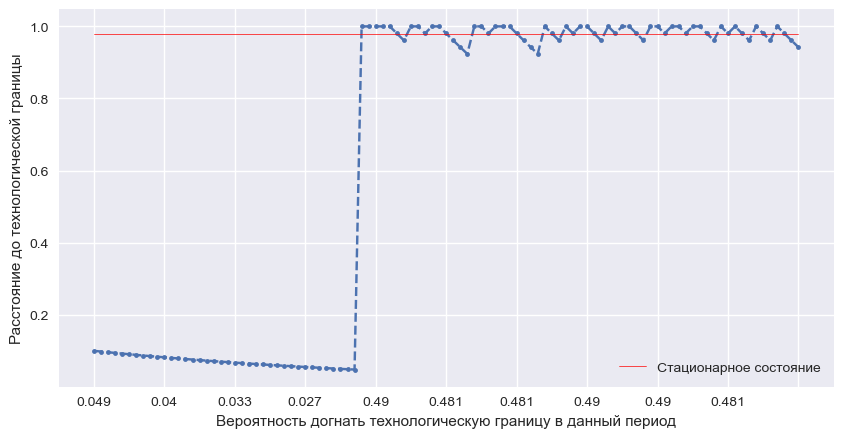

In [59]:
plt.figure(figsize=[10, 5], dpi=100)
n = 100

np.random.seed(436)
steps, probs = go_random(g, ksi, 0.1, n)

plt.plot(np.arange(n + 1), steps, '.--')
plt.plot(np.arange(n + 1), np.full(n+1, eqm(ksi, g)),
         'r', lw=0.5, label='Стационарное состояние')

plt.xticks(np.arange(n + 1)[::10],  # ticks
           probs[::10].round(3))  # labels

plt.xlabel('Вероятность догнать технологическую границу в данный период')
plt.ylabel('Расстояние до технологической границы')
plt.legend();

$\mu_t$ повторяет динамику $a_t$, что неудивительно - они связаны через константу!

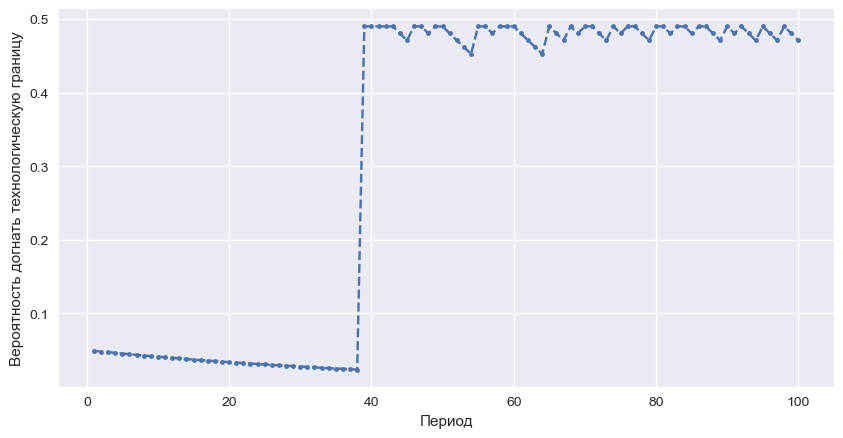

In [56]:
plt.figure(figsize=[10, 5], dpi=100)

plt.plot(np.arange(1, n + 1), probs, '.--')
plt.xlabel('Период')
plt.ylabel('Вероятность догнать технологическую границу');

Ну и основная диаграмма модели клубов конвергенции:

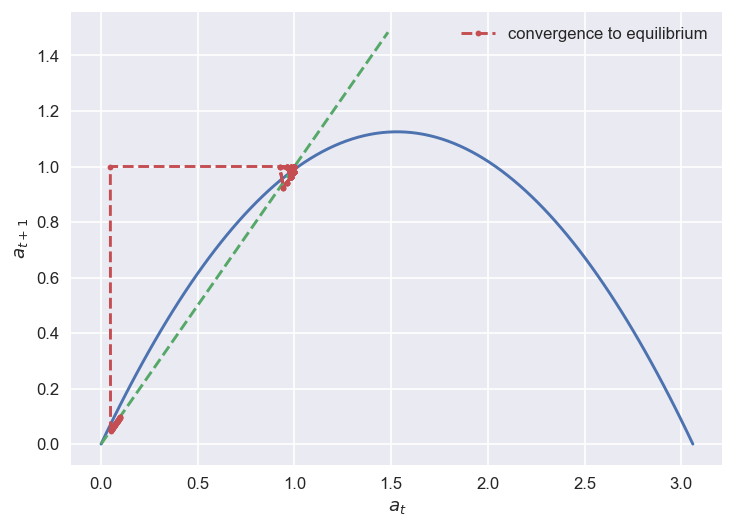

In [60]:
plt.figure(figsize=[7, 5], dpi=120)

t = np.linspace(0, (1 + ksi) * (1 + g) / ksi, 100)
a = a_t_1(g, ksi, t)

plt.plot(t, a)
plt.plot(t[t < 1.5], t[t < 1.5], '--')
plt.plot(steps[:-1], steps[1:], '.--',
         label='convergence to equilibrium')

plt.xlabel(r'$a_t$')
plt.ylabel(r'$a_{t+1}$')
plt.legend();